In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [6]:
csv_files = glob.glob("KSBA/*.csv")
df = pd.concat([pd.read_csv(file) for file in csv_files])
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.sort_values('Date_Time')

In [9]:
# Hücre 3: (Güncellenmiş Ön İşleme)
df['wind_speed_set_1'] = df['wind_speed_set_1'].ffill()

# 'Date_Time' henüz index değilse index yap
if 'Date_Time' in df.columns:
    df.set_index('Date_Time', inplace=True)


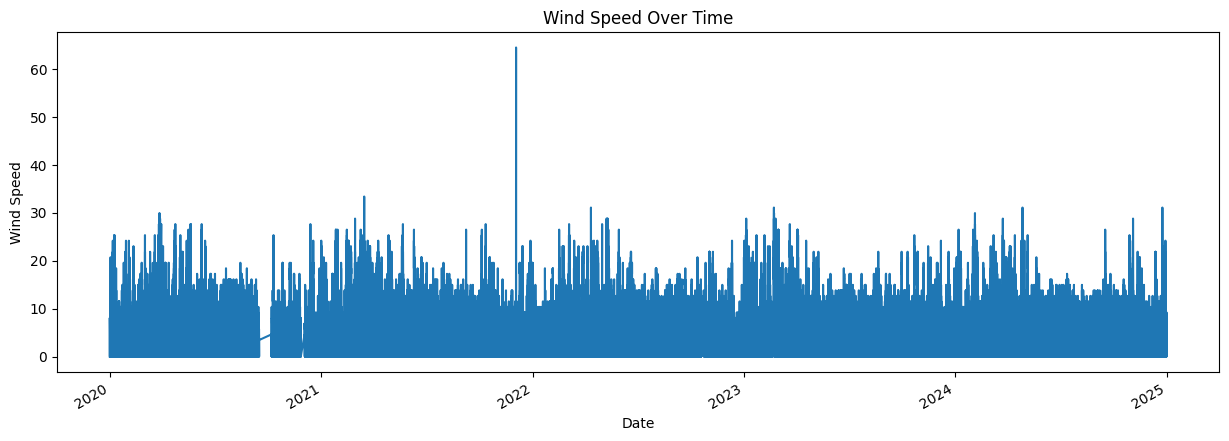

In [10]:
df['wind_speed_set_1'].plot(figsize=(15,5))
plt.title("Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.show()

In [11]:
train_size = int(len(df) * 0.8)
train, test = df['wind_speed_set_1'][:train_size], df['wind_speed_set_1'][train_size:]

In [12]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

c:\Users\frten\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\frten\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\frten\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
predictions = model_fit.forecast(len(test))

c:\Users\frten\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\frten\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


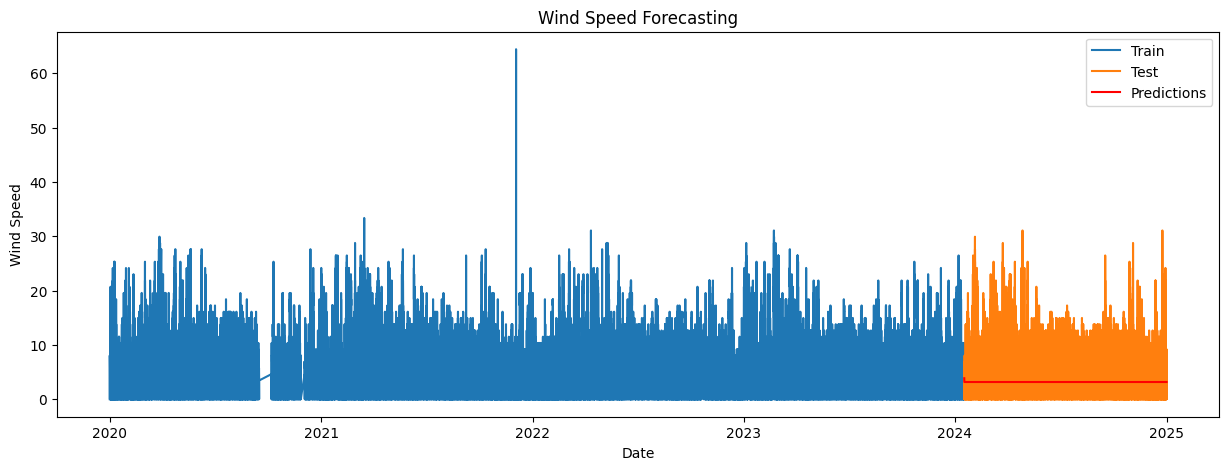

In [14]:
plt.figure(figsize=(15,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Forecasting")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}')


MSE: 20.87, MAE: 3.53, RMSE: 4.57
